# 6.5 - Boat Sales: Machine Learning

## Table of Contents

#### 1. Importing Libraries and data
#### 2. Data Cleaning
#### 3. Elbow Technique
#### 4. K-means Clustering

### 01. Importing Libraries and Data

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
import pylab as pl

In [45]:
# check matplotlib version

matplotlib.__version__

'3.8.4'

In [46]:
# ensure the charts created will be displayed

%matplotlib inline

In [47]:
# define path 

path = r'/Users/robson/Desktop/CareerFoundry/Data Immersion/Achivement 6/Data Sets'

In [48]:
# importing dataframe

df = pd.read_pickle(os.path.join(path, 'Prepared Data', '6.4_Boat_Sales_Encoded.pkl'))

In [49]:
# shape

df.shape

(6607, 26)

### 02. Data Cleaning

##### Subset - Only numerical values

In [50]:
# columns type

df.dtypes

Price                      object
Boat_Type                  object
Manufacturer               object
Type                       object
Year_Built                  int64
Length                    float64
Width                     float64
Material                   object
Views_7_days                int64
Location                   object
Country                    object
Price_Currency             object
Price_Amount              float64
Price_EUR                 float64
Visit_Rate                 object
Year_Built_Group           object
Material_Aluminium        float64
Material_Carbon_Fiber     float64
Material_GRP              float64
Material_Hypalon          float64
Material_PVC              float64
Material_Plastic          float64
Material_Rubber           float64
Material_Steel            float64
Material_Thermoplastic    float64
Material_Wood             float64
dtype: object

In [51]:
# create a subset with numerical variables only

sub_ml = df[['Year_Built','Length','Width','Views_7_days','Price_Amount',]]

In [52]:
sub_ml.columns

Index(['Year_Built', 'Length', 'Width', 'Views_7_days', 'Price_Amount'], dtype='object')

In [53]:
# check subset shape 

sub_ml.shape

(6607, 5)

In [54]:
# check first 10 rows

sub_ml.head(10)

Year_Built  Length  Width  Views_7_days  Price_Amount
0        2020    4.00   1.50            75        3490.0
1        2019    3.55   1.46            58        3399.0
2        1987    4.35   1.75           239        3500.0
3        2004    4.70   2.00            69        3500.0
4        2020    4.40   1.65           113        4600.0
5        1997    3.72   1.33           413        4500.0
6        1981    8.00   2.84           265        4000.0
7        2019    3.55   1.46            69        3999.0
8        2020    4.31   1.64            90        3930.0
9        1979    5.60   2.10            98        3900.0

### 3. Elbow Technique

In [55]:
# define the number of coluns for the Kmeans

num_cl = range(1,10) 

kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [56]:
# rate of variation for the given cluster option mentioned above

score = [kmeans[i].fit(sub_ml).score(sub_ml) for i in range(len(kmeans))]

In [57]:
# check variable score

score

[-4151525135645665.0,
 -1721561249254045.5,
 -997708673688241.5,
 -648636706185432.5,
 -422738170794408.44,
 -255275982868187.62,
 -183840693925928.25,
 -137164083073099.75,
 -132637505530972.75]

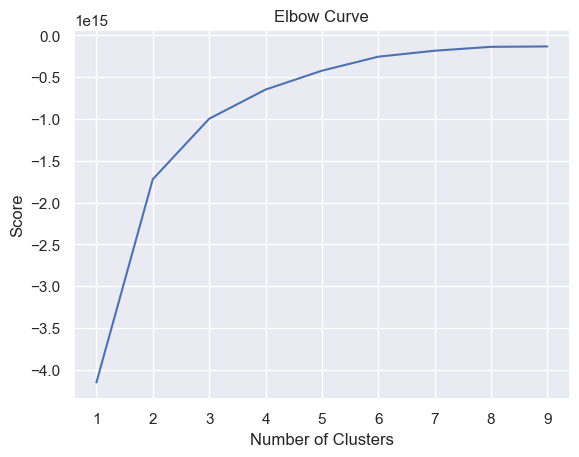

In [58]:
# plot with Pylab the elbow curve

pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

###### According to the visualization above, it is possible to notice that there is a huge leap from the first cluster to the second. But, the last cluster before the curve starts to straighten out is the third, what makes it the most optimal count in this case. 

### 4. K-means Clustering

In [59]:
# create a k-means object

kmeans = KMeans(n_clusters=3)

In [60]:
# fit the k-means object onto the data set

kmeans.fit(sub_ml)

KMeans(n_clusters=3)

In [61]:
# create a prediction 

sub_ml['Clusters'] = kmeans.fit_predict(sub_ml)

/var/folders/20/jwmkwsbs0qn0p5jn7rklqwnm0000gn/T/ipykernel_7589/56972375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_ml['Clusters'] = kmeans.fit_predict(sub_ml)


In [62]:
# check prediction

sub_ml.head()

Year_Built  Length  Width  Views_7_days  Price_Amount  Clusters
0        2020    4.00   1.50            75        3490.0         0
1        2019    3.55   1.46            58        3399.0         0
2        1987    4.35   1.75           239        3500.0         0
3        2004    4.70   2.00            69        3500.0         0
4        2020    4.40   1.65           113        4600.0         0

In [63]:
# value counts

sub_ml['Clusters'].value_counts()

Clusters
0    6336
2     238
1      33
Name: count, dtype: int64

In [64]:
# columns

sub_ml.columns

Index(['Year_Built', 'Length', 'Width', 'Views_7_days', 'Price_Amount',
       'Clusters'],
      dtype='object')

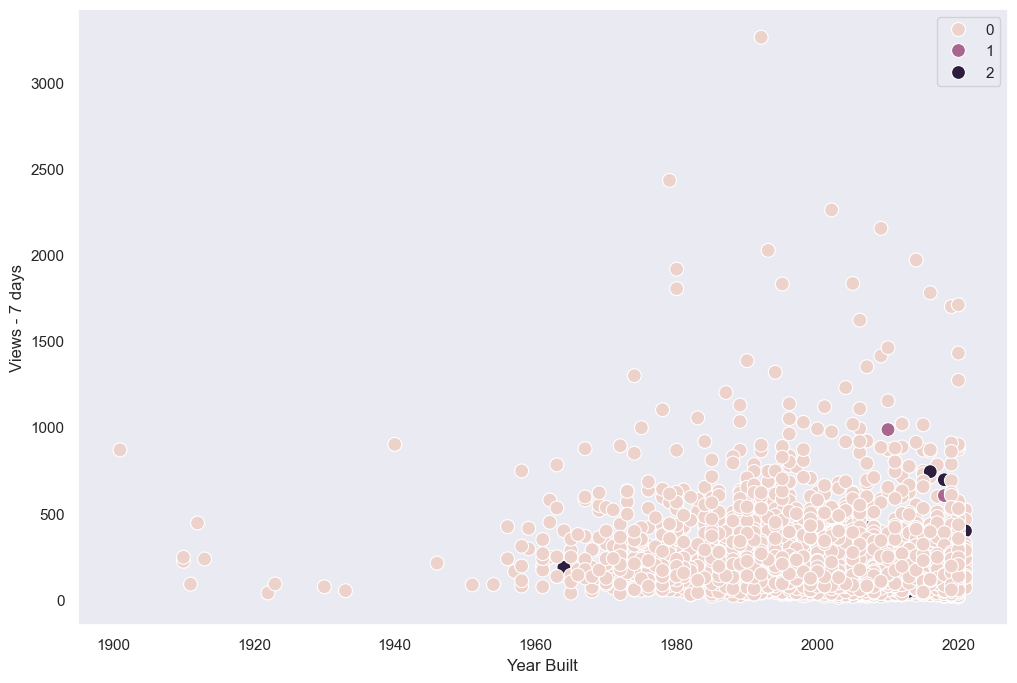

In [65]:
# Plot the cluster for 'Year_Built' and 'Views_7_days' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = sub_ml['Year_Built'], y = sub_ml['Views_7_days'], hue = kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Year Built')
plt.ylabel('Views - 7 days')
plt.show()

###### I will apply the PCA in this case, since the cluster do not give us any insights, as almost all of them are '0', and the few datapoints that fall in the '1' and '2' are not even visible. 

##### Standardization

In [66]:
# It is necessary to apply a standardization, considering the huge difference between both variables 
# and that is not possible to observe any datapoint other than 0

scaler = StandardScaler()

segmentation_std = scaler.fit_transform(sub_ml)

##### Dimensionality Reduction with PCA

In [67]:
# Dimensionality Reduction with PCA

pca = PCA()
pca.fit(segmentation_std)

PCA()

In [68]:
# Check how much variance is explained by each column 

pca.explained_variance_ratio_

array([0.47189208, 0.19880798, 0.16221017, 0.09499582, 0.0600419 ,
       0.01205204])

Text(0, 0.5, 'Cumulative Explained Variance')

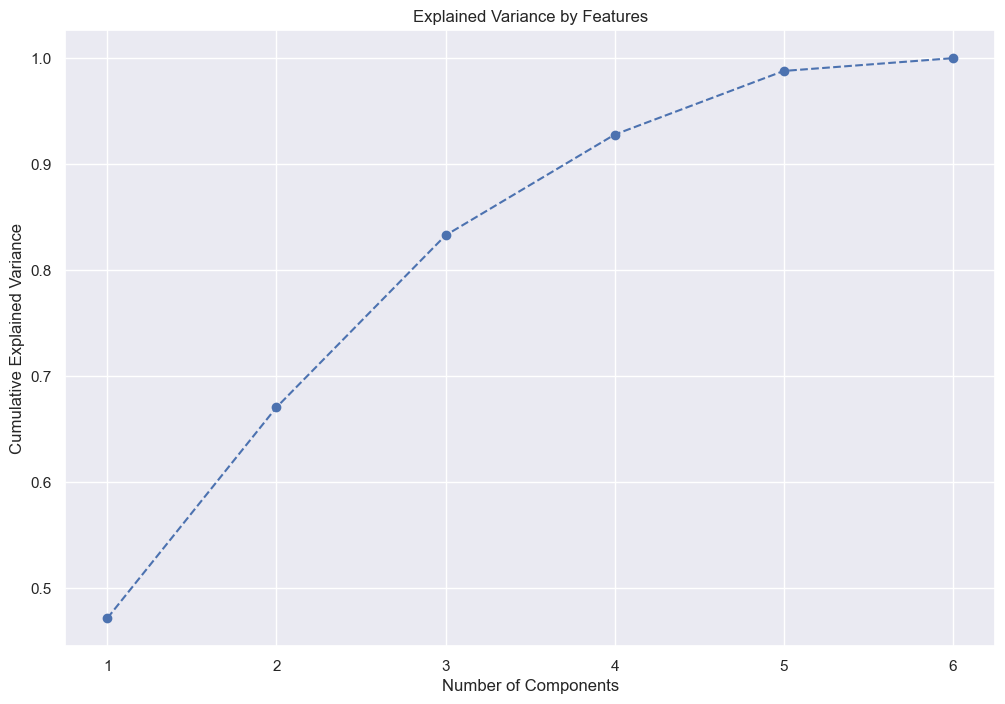

In [69]:
# plot to check how much each variance is explained

plt.figure(figsize=(12,8))
plt.plot(range(1,7), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Features')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [70]:
# to be able to keep 80% of the variance, 3 components will be keep - the same ideia of the clusters will be apply here. 
# the last number of components before the curve starts to straighten out is the third, what makes it the most optimal count in this case. 

pca = PCA(n_components=3)

In [71]:
# fit the model 

pca.fit(segmentation_std)

PCA(n_components=3)

In [72]:
# transform to be able to calculate the resulting components scores for the element

pca.transform(segmentation_std)

array([[-1.86225456, -1.52603695,  0.57151087],
       [-1.91691625, -1.53830677,  0.50379436],
       [-1.87700088,  1.11949622,  0.26847482],
       ...,
       [-1.80440738,  1.50066708,  0.35042428],
       [-1.88948232, -0.54378211,  1.60994122],
       [-1.94842639, -1.06436097,  1.0173394 ]])

In [73]:
# score - pca

scores_pca = pca.transform(segmentation_std)

##### K-means Clustering with PCA 

In [74]:
# fit the kmeans using the transformed data from PCA

wcss = []
for i in range (1,10):
  kmeans_pca = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)

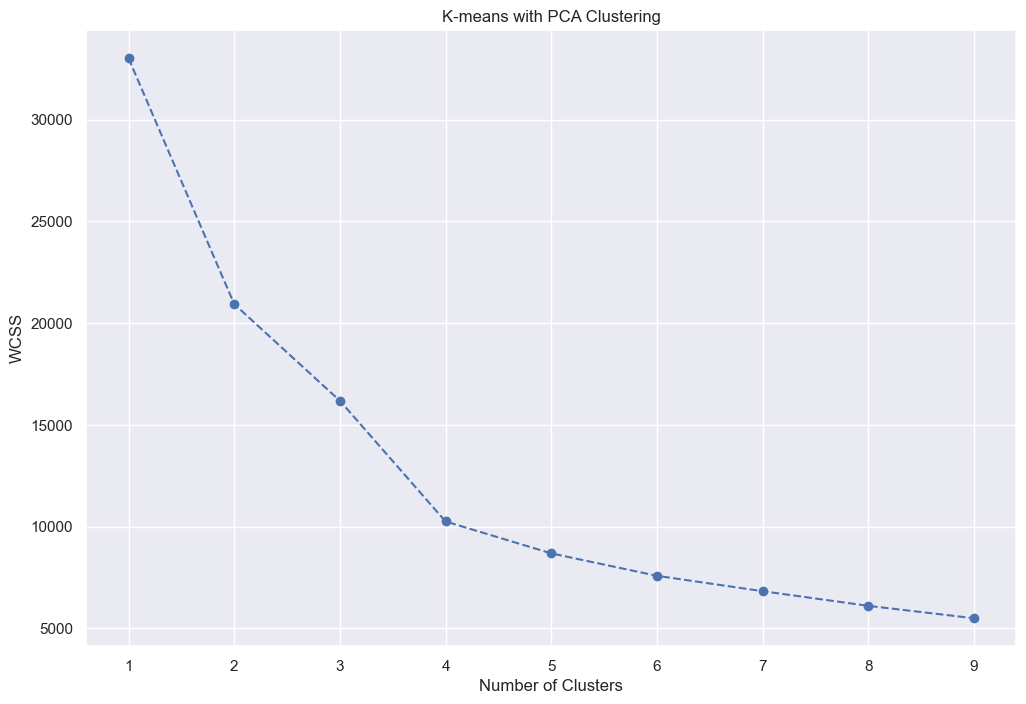

In [75]:
# plot the number of components 

plt.figure(figsize=(12, 8))
plt.plot(range(1,10), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [76]:
# According to the visualization above the number 4 cluster is the best, as it is the last cluster before the curve starts to straighten out. 

kmeans_pca = KMeans(n_clusters= 4, init = 'k-means++', random_state = 42)

In [77]:
# fit data with k-means pca model

kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

##### K-means Clustering with PCA Results

In [78]:
# create a new dataframe with subset features, PCA scores and assigned clusters

df_segm_pca_kmeans = pd.concat ([sub_ml.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3:] = ['Component 1','Component 2','Component 3']

# add another column 

df_segm_pca_kmeans['Segment_Kmeans_Pca'] = kmeans_pca.labels_

In [79]:
# check

df_segm_pca_kmeans.head()

Year_Built  Length  Width  Views_7_days  Price_Amount  Clusters  \
0        2020    4.00   1.50            75        3490.0         0   
1        2019    3.55   1.46            58        3399.0         0   
2        1987    4.35   1.75           239        3500.0         0   
3        2004    4.70   2.00            69        3500.0         0   
4        2020    4.40   1.65           113        4600.0         0   

   Component 1  Component 2  Component 3  Segment_Kmeans_Pca  
0    -1.862255    -1.526037     0.571511                   1  
1    -1.916916    -1.538307     0.503794                   1  
2    -1.877001     1.119496     0.268475                   2  
3    -1.571878    -0.467481    -0.034071                   1  
4    -1.777949    -1.369005     0.672887                   1

In [80]:
# drop Clusters column

df_segm_pca_kmeans.drop(columns = ['Clusters'], inplace = True)

In [81]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment_Kmeans_Pca'].map({0:'first', 1: 'second', 2: 'third', 3: 'fourth'})

In [82]:
df_segm_pca_kmeans.head()

Year_Built  Length  Width  Views_7_days  Price_Amount  Component 1  \
0        2020    4.00   1.50            75        3490.0    -1.862255   
1        2019    3.55   1.46            58        3399.0    -1.916916   
2        1987    4.35   1.75           239        3500.0    -1.877001   
3        2004    4.70   2.00            69        3500.0    -1.571878   
4        2020    4.40   1.65           113        4600.0    -1.777949   

   Component 2  Component 3  Segment_Kmeans_Pca Segment  
0    -1.526037     0.571511                   1  second  
1    -1.538307     0.503794                   1  second  
2     1.119496     0.268475                   2   third  
3    -0.467481    -0.034071                   1  second  
4    -1.369005     0.672887                   1  second

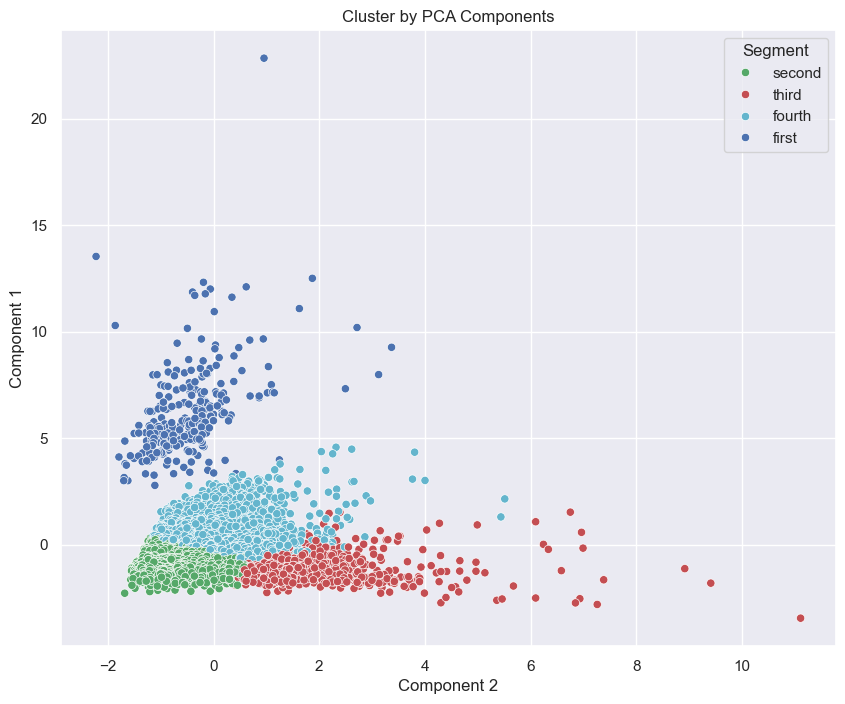

In [83]:
# plot data by PCA components. The Y axis is the first, X second

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Component 2', y='Component 1', hue='Segment', data=df_segm_pca_kmeans, palette=['g', 'r', 'c', 'b'])
plt.title('Cluster by PCA Components')
plt.show()

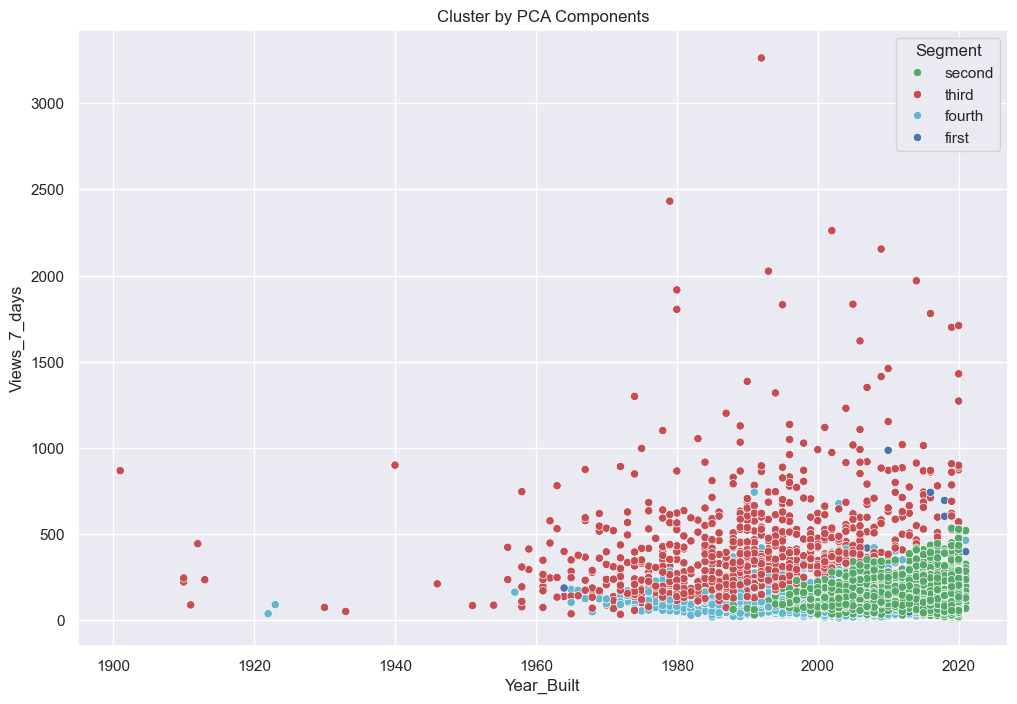

In [84]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Year_Built', y='Views_7_days', hue='Segment', data=df_segm_pca_kmeans, palette=['g', 'r', 'c', 'b'])
plt.title('Cluster by PCA Components')
plt.show()

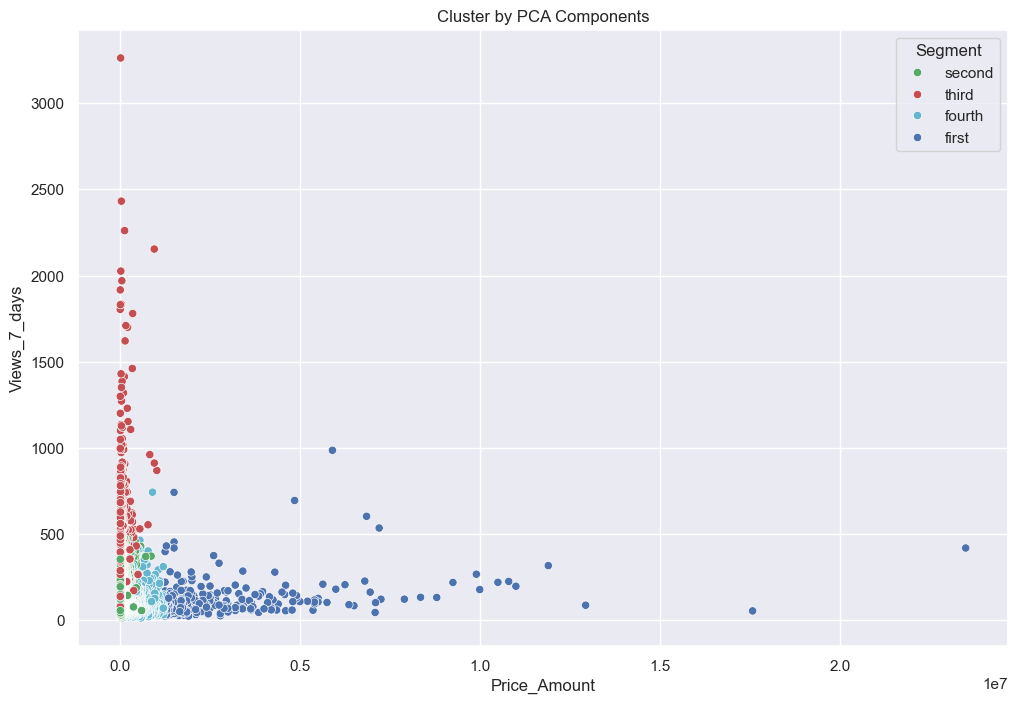

In [85]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Price_Amount', y='Views_7_days', hue='Segment', data=df_segm_pca_kmeans, palette=['g', 'r', 'c', 'b'])
plt.title('Cluster by PCA Components')
plt.show()

In [86]:
df_segm_pca_kmeans['Segment'].value_counts()

Segment
second    2811
fourth    2633
third      891
first      272
Name: count, dtype: int64

In [87]:
df_segm_pca_kmeans['Segment_Kmeans_Pca'].value_counts()

Segment_Kmeans_Pca
1    2811
3    2633
2     891
0     272
Name: count, dtype: int64

In [88]:
df_segm_pca_kmeans['Year_Built'].value_counts()

Year_Built
2020    976
2019    486
2008    333
2007    277
2006    274
       ... 
1957      1
1933      1
1954      1
1940      1
1951      1
Name: count, Length: 78, dtype: int64

In [89]:
df_segm_pca_kmeans.columns

Index(['Year_Built', 'Length', 'Width', 'Views_7_days', 'Price_Amount',
       'Component 1', 'Component 2', 'Component 3', 'Segment_Kmeans_Pca',
       'Segment'],
      dtype='object')

In [90]:
# substitute the E+

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [91]:
# Statical Analysis

df_segm_pca_kmeans.groupby('Segment').agg({'Year_Built':['min', 'max','mean', 'median'], 
                         'Length':['mean', 'median'], 
                         'Width':['mean', 'median'],
                         'Views_7_days':['min', 'max', 'mean', 'median'],
                         'Price_Amount':['min', 'max', 'mean', 'median']})

Year_Built                         Length        Width         \
               min   max     mean   median   mean median  mean median   
Segment                                                                 
first         1964  2021 2013.121 2014.000 23.906 23.150 5.918  5.750   
fourth        1922  2021 2003.462 2005.000 14.542 13.860 4.297  4.250   
second        1987  2021 2014.566 2018.000  7.805  7.620 2.686  2.560   
third         1901  2020 1989.966 1991.000  8.371  8.000 2.804  2.600   

        Views_7_days                       Price_Amount               \
                 min   max    mean  median          min          max   
Segment                                                                
first             24   986 126.449 100.000   395000.000 23500000.000   
fourth            13   743 102.988  90.000    11990.000  1203950.000   
second            15   534 137.439 117.000     3399.000   895000.000   
third             34  3263 424.810 350.000     3500.000  1020000.000   

                                 
               mean      median  
Segment                          
first   2996326.827 2074500.000  
fourth   303150.766  215000.000  
second    89207.604   58800.000  
third     61503.700   32000.000

##### Analysis - According to Visualizations and Statical Analysis above. 

###### First of all, regarding the cluster, It is important to highlight that when initially analyzing without the use of clusters and segments, it was impossible to find a pattern between the data points. 

###### Now, it is possible to notice certain patterns, such as: 
###### * Segment first's boats were built between 1964 - 2021, with most of them being from 2010 onwards. This segment is responsible for the most expensive boats, ranging from 395,000 - 23,500,000 and has the second highest number of views, ranging from 24 - 986, and an average of 126 per week.  
###### * Segment second shows relatively new boats, from 1987 onwards, but the price is low, comparing to the other groups, ranging around 3,399 - 895,000k. The number of visits for this segment is the lowest ranging from 15-534, and with an average of 137 per week.
###### * Segment third is the one with the greatest representation in the Year Built table, being present in almost all periods of time present in the column, however, it has a high range of price compared to the other segments, as ranges around 3,500-1,020,000 in relation to the price of the boat. Also, has the highest number of visits around all segments, reaching 3263 for week. 
###### * Segment fourth is present in almost all the built year timeline, but it can see that most of its presence start around the year of 2000s. Boats price vary around 11,990 to 1,203,950, the number of visits range from 13-743 and has the lowest average of views, only 102 per week. 

###### Thus, the information brought is of utmost importance for future analyses, as it provide us insights and, at the same time, separate the data points into four groups, which have different number of visits, price and year of construction, that it might be explained later. Perhaps the type of material, place of manufacture, type of boat, affect these factors directly, which could explain some matter, such as the fact that the third segment has boats that are unexpensive, as the second segment, but not as popular as the latter. 

In [92]:
df_segm_pca_kmeans.to_csv(os.path.join(path, 'Prepared Data', '6.5_BoatSales_PCA.csv'))